In [ ]:
! chmod 600 ~/ kaggle.json

In [ ]:
!kaggle datasets download -d danialsharifrazi/cad-cardiac-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/danialsharifrazi/cad-cardiac-mri-dataset
License(s): unknown
100% 2.86G/2.86G [00:11<00:00, 291MB/s]
100% 2.86G/2.86G [00:11<00:00, 260MB/s]


In [ ]:
! unzip cad-cardiac-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Sick/Directory_26/SR_57/IM00059.jpg  
  inflating: Sick/Directory_26/SR_57/IM00060.jpg  
  inflating: Sick/Directory_26/SR_58/IM00001.jpg  
  inflating: Sick/Directory_26/SR_58/IM00002.jpg  
  inflating: Sick/Directory_26/SR_58/IM00003.jpg  
  inflating: Sick/Directory_26/SR_58/IM00004.jpg  
  inflating: Sick/Directory_26/SR_58/IM00005.jpg  
  inflating: Sick/Directory_26/SR_58/IM00006.jpg  
  inflating: Sick/Directory_26/SR_58/IM00007.jpg  
  inflating: Sick/Directory_26/SR_58/IM00008.jpg  
  inflating: Sick/Directory_26/SR_58/IM00009.jpg  
  inflating: Sick/Directory_26/SR_58/IM00010.jpg  
  inflating: Sick/Directory_26/SR_58/IM00011.jpg  
  inflating: Sick/Directory_26/SR_58/IM00012.jpg  
  inflating: Sick/Directory_26/SR_58/IM00013.jpg  
  inflating: Sick/Directory_26/SR_59/IM00001.jpg  
  inflating: Sick/Directory_26/SR_59/IM00002.jpg  
  inflating: Sick/Directory_26/SR_59/IM00003.jpg  
  inflating: Sick/Directory_26/

In [ ]:
import os
import cv2
import numpy as np
import random

def load_images_recursively(data_dir, max_images_per_dir=11):
    images = []
    labels = []

    # Helper function to process a directory
    def process_directory(directory, label):
        nonlocal images, labels
        for root, dirs, files in os.walk(directory):
            # Filter files to only include image files
            image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

            if len(image_files) > 0:
                print(f"Processing directory: {root} with {len(image_files)} images.")

                # If there are more images than the limit, randomly sample `max_images_per_dir`
                if len(image_files) > max_images_per_dir:
                    sampled_files = random.sample(image_files, max_images_per_dir)
                else:
                    sampled_files = image_files

                # Load sampled images
                for file in sampled_files:
                    img_path = os.path.join(root, file)
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.resize(img, (128, 128))  # Resize if needed
                        images.append(img)
                        labels.append(label)
                    else:
                        print(f"Failed to load image: {img_path}")

            if not files and not dirs:
                print(f"No images in: {root}")

    # Iterate through main categories 'normal' and 'sick'
    for label, folder_name in enumerate(['Normal', 'Sick']):
        folder_path = os.path.join(data_dir, folder_name)
        if os.path.isdir(folder_path):
            print(f"Entering directory: {folder_path}")
            process_directory(folder_path, label)
        else:
            print(f"Directory not found: {folder_path}")

    images = np.array(images) / 255.0  # Normalize pixel values
    labels = np.array(labels)
    print(f"Loaded {len(images)} images.")
    return images, labels

# Example usage



In [ ]:
# Example usage
data_dir = '/content/data'  # Replace with your dataset path
X, y = load_images_recursively(data_dir, max_images_per_dir=11)

if len(X) == 0:
    raise ValueError("No images were loaded. Please check the dataset structure and image formats.")

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Entering directory: /content/data/Normal
Processing directory: /content/data/Normal/Directory_13/series0024-Body with 3 images.
Processing directory: /content/data/Normal/Directory_13/series0042-Body with 20 images.
Processing directory: /content/data/Normal/Directory_13/series0028-Body with 8 images.
Processing directory: /content/data/Normal/Directory_13/series0003-Body with 40 images.
Processing directory: /content/data/Normal/Directory_13/series0075-Body with 1 images.
Processing directory: /content/data/Normal/Directory_13/series0031-Body with 60 images.
Processing directory: /content/data/Normal/Directory_13/series0069-Body with 1 images.
Processing directory: /content/data/Normal/Directory_13/series0029-Body with 1 images.
Processing directory: /content/data/Normal/Directory_13/series0501-unknown(1) with 3 images.
Processing directory: /content/data/Normal/Directory_13/series0051-Body with 3 images.
Processing directory: /content/data/Normal/Directory_13/series0020-Body with 40 

In [ ]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(cnn, 'cnn_model_1.pkl')  # Save the model to a .pkl file
print("Model saved successfully!")


Model saved successfully!


In [ ]:
from google.colab import files

# Download the Joblib model
files.download('cnn_model_3.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cnn.save('cnn_model_3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install tensorflow --upgrade


In [ ]:
import pickle

from tensorflow.keras.models import load_model

# Assuming the uploaded file is named 'model.h5'
model = load_model('/content/cnn_model_3.h5')

# Step 4: Verify the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,451 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 172ms/step
Confusion Matrix:
 [[2089  139]
 [ 147 1600]]


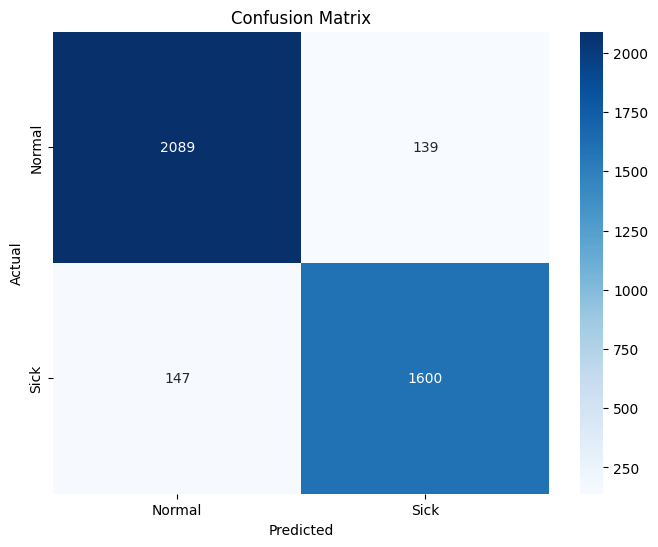

Classification Report:
               precision    recall  f1-score   support

      Normal       0.93      0.94      0.94      2228
        Sick       0.92      0.92      0.92      1747

    accuracy                           0.93      3975
   macro avg       0.93      0.93      0.93      3975
weighted avg       0.93      0.93      0.93      3975



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Step 6: Confusion Matrix and Recall
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Sick'], yticklabels=['Normal', 'Sick'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Normal', 'Sick'])
print("Classification Report:\n", report)